## Housing Price Prediction using Advance Linear Regression and Regularization concepts

#### Objective :
 Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [3]:
# importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

# to ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the dataset
house = pd.read_csv('train.csv')

In [5]:
# info about the house data set imported
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# seeing the data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# to check duplicates in the values
house.duplicated().value_counts()

False    1460
dtype: int64

In [8]:
#Checking if there are any missing values
house.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [9]:
# checking number of missing values
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
# The columns with missing data
columns_with_missing_value = house.columns[house.isnull().any()]

In [11]:
# checking the column with missing percentage
for values in columns_with_missing_value:
    print(values,round(house[values].isnull().sum()*100.0/house.shape[0],2))

LotFrontage 17.74
Alley 93.77
MasVnrType 0.55
MasVnrArea 0.55
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Electrical 0.07
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55
PoolQC 99.52
Fence 80.75
MiscFeature 96.3


In [12]:
# dropping the columns with values greater than 30%
for values in columns_with_missing_value:
    if house[values].isnull().sum()*100.0/house.shape[0] > 30:
        house.drop(values,1,inplace=True)

In [13]:
# the number of columns after removing the missing values
house.shape

(1460, 76)

There are total 5 columns with values greater than 30% of missing values which does not make sense to replace the numbers with mean, median and mode because of which the columns have been dropped.

In [14]:
# checking the summary statistics for columns in the data
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
columns_missing_values = house.columns[house.isnull().any()]

In [16]:
# checking the columns and trying to impute the values
for values in columns_missing_values:
    print(values,round(house[values].isnull().sum()*100.0/house.shape[0],2))

LotFrontage 17.74
MasVnrType 0.55
MasVnrArea 0.55
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinType2 2.6
Electrical 0.07
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageQual 5.55
GarageCond 5.55


In [17]:
# Given the LotFrontage  is float type filling the value with median
house['LotFrontage'] = house['LotFrontage'].fillna(house['LotFrontage'].median())

In [18]:
# checking the summary statistics of GarageYrBlt
house['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [19]:
# GarageYrBlt is float type filling with mean as the mean and median are relatively close so we can fill with either of them

house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['GarageYrBlt'].mean())

In [20]:
## checking the summary statistics of GarageYrBlt
house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea'>

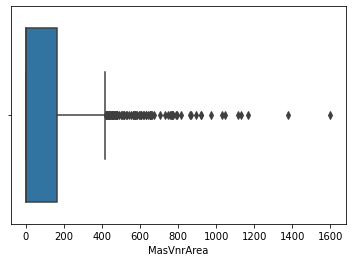

In [21]:
# boxplot to check the outliers for MasVnrArea
sns.boxplot(x='MasVnrArea',data = house)

Looks like there are so many outliers in MasVnrArea so need to check the normal distribution and this can handled while doing scaling

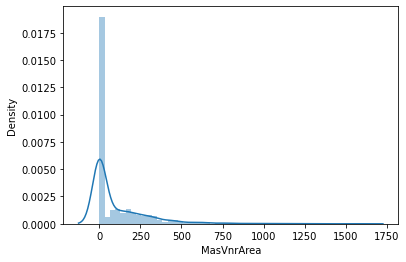

In [22]:
sns.distplot(house['MasVnrArea'])
plt.show()

In [23]:
# as the mean is effected by outliers we will be working 
## Calculating the extreme boundaries
IQR= house['MasVnrArea'].quantile(0.75) - house['MasVnrArea'].quantile(0.25)
IQR

lower_value= house['MasVnrArea'].quantile(0.25)-(IQR*3)
upper_value= house['MasVnrArea'].quantile(0.75)+(IQR*3)
print(lower_value), print(upper_value)

-498.0
664.0


(None, None)

In [24]:
# to handle the outlier I will imputing the values with upper values
house.loc[house['MasVnrArea']>=upper_value,'MasVnrArea'] = upper_value

In [25]:
house['MasVnrArea'].describe()

count    1452.000000
mean       99.279614
std       160.862618
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max       664.000000
Name: MasVnrArea, dtype: float64

In [26]:
# replacing MasVnrArea with Mean Values
house['MasVnrArea'] = house['MasVnrArea'].fillna(house['MasVnrArea'].mean())

In [27]:
# to check unique value for all catgorical variables
pd.set_option('display.max_rows', None)
catval = house.select_dtypes(['object'])
for col in catval.columns:
     print('\n')
     print('The column name ',col)   
     print(catval[col].value_counts())



The column name  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


The column name  Street
Pave    1454
Grvl       6
Name: Street, dtype: int64


The column name  LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


The column name  LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


The column name  Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


The column name  LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


The column name  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


The column name  Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber 

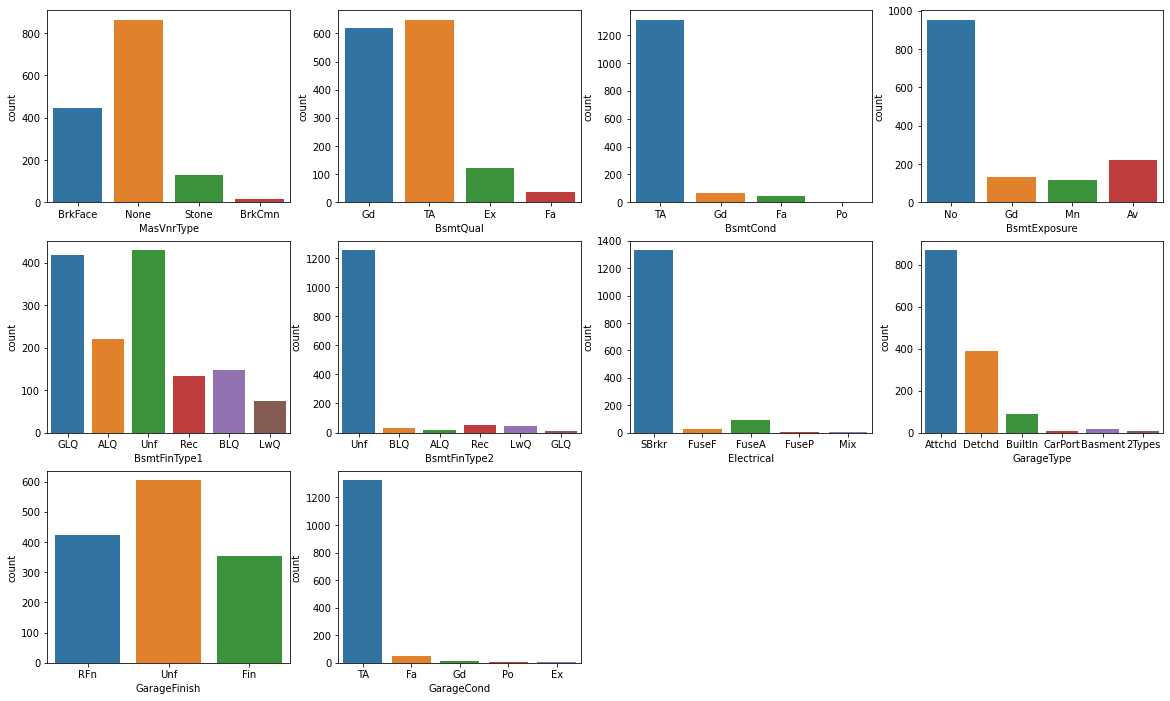

In [28]:
# to handle the missing categorical variables by plotting the data
plt.figure(figsize=(20,12))
plt.subplot(3,4,1)
sns.countplot(x = 'MasVnrType',data = house)
plt.subplot(3,4,2)
sns.countplot(x = 'BsmtQual',data = house)
plt.subplot(3,4,3)
sns.countplot(x = 'BsmtCond',data = house)
plt.subplot(3,4,4)
sns.countplot(x = 'BsmtExposure',data = house)
plt.subplot(3,4,5)
sns.countplot(x = 'BsmtFinType1',data = house)
plt.subplot(3,4,6)
sns.countplot(x = 'BsmtFinType2',data = house)
plt.subplot(3,4,7)
sns.countplot(x = 'Electrical',data = house)
plt.subplot(3,4,8)
sns.countplot(x = 'GarageType',data = house)
plt.subplot(3,4,9)
sns.countplot(x = 'GarageFinish',data = house)
plt.subplot(3,4,10)
sns.countplot(x = 'GarageQual',data = house)
plt.subplot(3,4,10)
sns.countplot(x = 'GarageCond',data = house)
plt.show()

In [29]:
# replacing the value with default values
house['GarageType'] = house['GarageType'].replace(np.nan, 'Attchd')
house['GarageFinish'] = house['GarageFinish'].replace(np.nan, 'Unf')
house['GarageCond'] = house['GarageCond'].replace(np.nan, 'TA')
house['GarageQual'] = house['GarageQual'].replace(np.nan, 'None')
house['MasVnrType'] = house['MasVnrType'].replace(np.nan, 'None') 
house['Electrical'] = house['Electrical'].replace(np.nan, 'SBrkr') 
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan, 'No')
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan, 'Unf')
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan, 'Unf')
house['BsmtCond'] = house['BsmtCond'].replace(np.nan, 'TA')
house['BsmtQual'] = house['BsmtQual'].replace(np.nan, 'TA')

In [30]:
# to check if there any missing values
(house.isnull().sum() / house.isnull().count()*100).sort_values(ascending = False).head(30)

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
dtype: float64

In [31]:
# to check if there are no null values 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [32]:
# describing the numerical variables to see if there are any columns which have high outliers
val_list_1 = ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath']
house[val_list_1].describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,1971.267808,1984.865753,730.500000,69.863699,10516.828082,1971.267808,1984.865753,99.279614,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342
std,421.610009,22.027677,9981.264932,30.202904,20.645407,421.610009,22.027677,9981.264932,30.202904,20.645407,160.420990,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,664.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000


In [33]:
val_list_2 = ['BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
house[val_list_2].describe()

,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


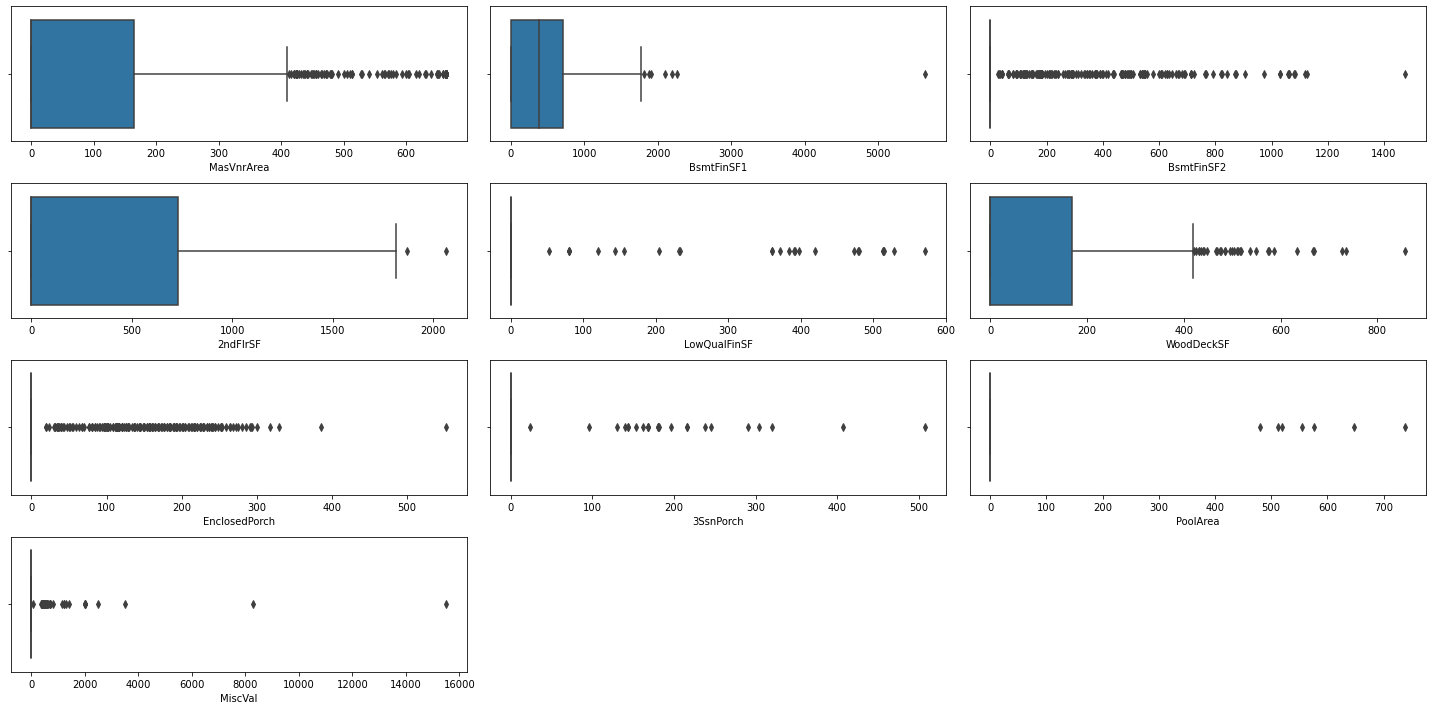

In [34]:
plt.figure(figsize=(20, 12))
for i, feature in enumerate(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','LowQualFinSF','WoodDeckSF','EnclosedPorch','3SsnPorch','PoolArea','MiscVal']):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(house[feature])
    plt.tight_layout()
plt.show()

Columns:
* MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,LowQualFinSF,WoodDeckSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal
The above columns have high outliers as we can see from the above description and statistics

In [35]:
house.drop(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','2ndFlrSF','LowQualFinSF','WoodDeckSF','EnclosedPorch','3SsnPorch','PoolArea','MiscVal'], axis=1, inplace=True)

In [36]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'OpenPorchSF',
       'ScreenPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice']

In [37]:
# removing Id column as well
house.drop(['Id'], axis=1, inplace=True)

In [38]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'OpenPorchSF',
       'ScreenPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
    

In [39]:
# to check the number of columns and data
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,OpenPorchSF,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,35,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,84,0,12,2008,WD,Normal,250000


#### Visualizing Data

In [40]:
catval.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
# to show the numerical variables in the data
numvar = house.select_dtypes(['int', 'float'])

In [42]:
# to check the columns with numerical variables
numvar.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'ScreenPorch',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [43]:
#checking the vakues in the numerical columns
numvar.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,150,856,856,...,8,0,2003.0,2,548,61,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,284,1262,1262,...,6,1,1976.0,2,460,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,434,920,920,...,6,1,2001.0,2,608,42,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,540,756,961,...,7,1,1998.0,3,642,35,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,490,1145,1145,...,9,1,2000.0,3,836,84,0,12,2008,250000


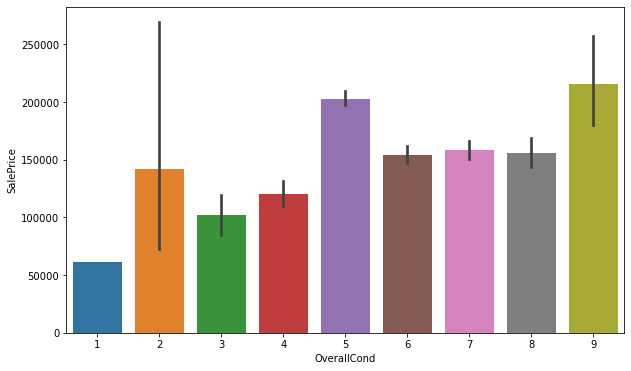

In [44]:
# BiVariate Analysis on Categorical values on Price
plt.figure(figsize=(10,6))
sns.barplot(x='OverallCond',y='SalePrice',data=house,estimator=np.mean)
plt.show()

As it shows that house with excellent condition have good price

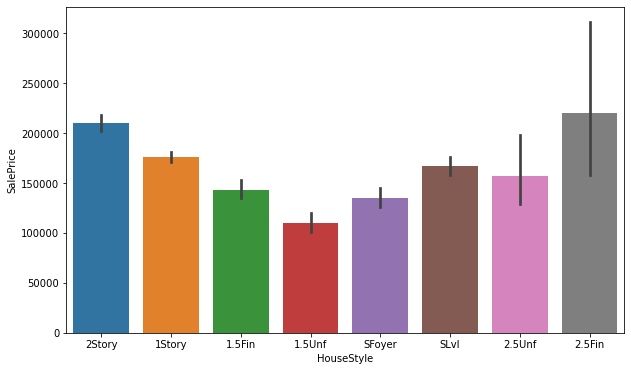

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='HouseStyle',y='SalePrice',data=house,estimator=np.mean)
plt.show()

The house with 2 and half stories and 2nd level finished are having slightly higher price when compared to 2 stories

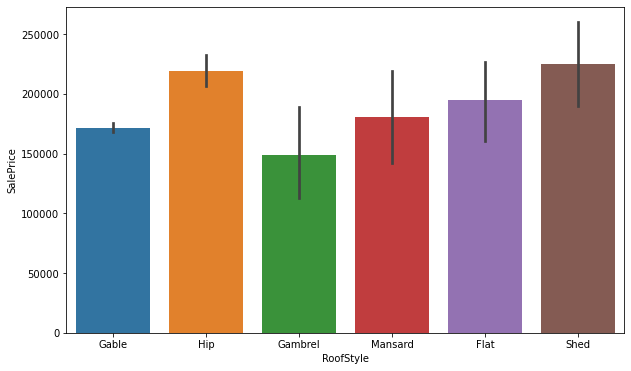

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='RoofStyle',y='SalePrice',data=house,estimator=np.mean)
plt.show()

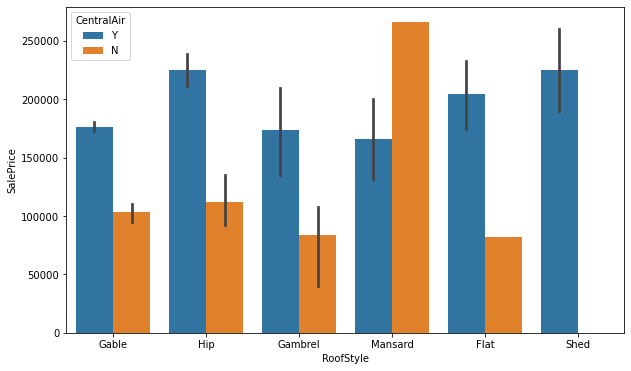

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='RoofStyle',y='SalePrice',hue = 'CentralAir',data=house,estimator=np.mean)
plt.show()

The Hip & Shed roofstyle with Fully Air Conditioned have same price where as the Mansard roofstyle with Non Central Air condition is having highest price when compared to all.

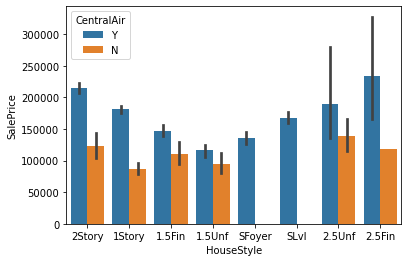

In [48]:
sns.barplot(x='HouseStyle',y='SalePrice',hue = 'CentralAir',data=house,estimator=np.mean)
plt.show()

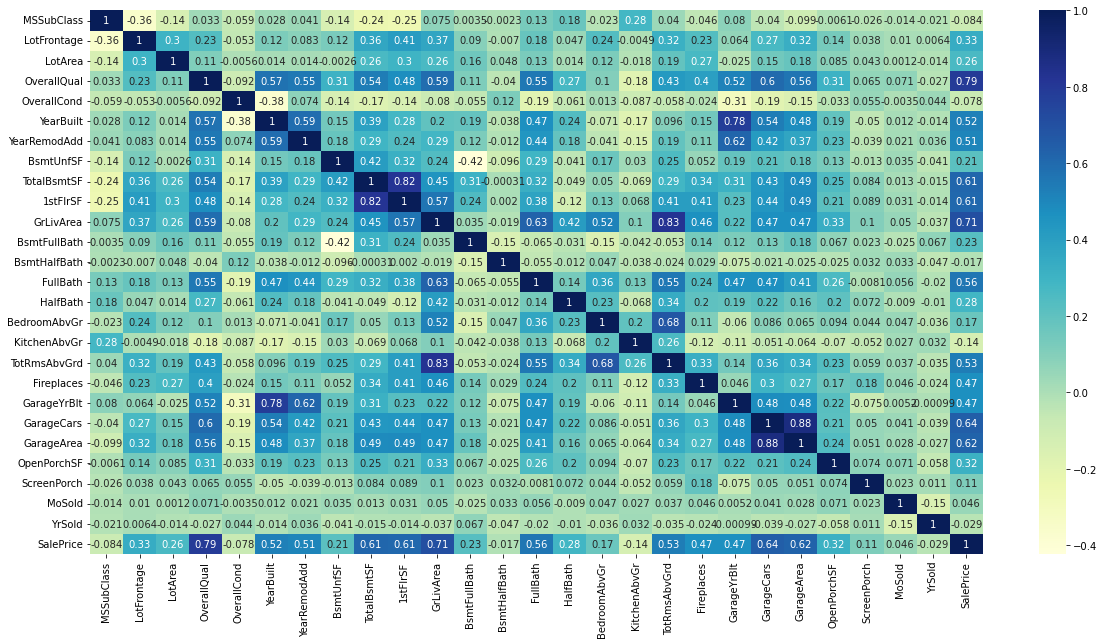

In [49]:
# drawing correlation coefficient of values
plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="YlGnBu")
plt.show()

As per above analysis we can see there is strong coorelation between few variables
* TotRmsAbvGrd and GrLivArea (0.83)
* Garage Cars and Garage Area (0.88)
* TotalBsmtSF and 1stFlrSF (0.82)
* GarageYrBuilt and YearBuilt (0.78)

We need to drop one feature each to avoid any issue while computation

In [50]:
# dropping one column each for columns with high correlation
house.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

In [51]:
# encoding categorical features
var = ['LotShape']
house[var] = house[var].apply(lambda x: x.map({'Reg':0,'IR1':1,'IR2':2,'IR3':3}))
var = ['Utilities']
house[var] = house[var].apply(lambda x: x.map({'AllPub':0, 'NoSewr':1, 'NoSeWa':2, 'ELO':3}))
var = ['LandSlope']
house[var] = house[var].apply(lambda x: x.map({'Gtl':0,'Mod':1,'Sev':2}))
var = ['ExterQual']
house[var] = house[var].apply(lambda x: x.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}))
var = ['ExterCond']
house[var] = house[var].apply(lambda x: x.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}))
var = ['BsmtQual']
house[var] = house[var].apply(lambda x: x.map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}))
var = ['BsmtCond']
house[var] = house[var].apply(lambda x: x.map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}))
var = ['BsmtExposure']
house[var] = house[var].apply(lambda x: x.map({'Gd':0,'Av':1,'Mn':2,'No':3,'NA':4}))
var = ['BsmtFinType1']
house[var] = house[var].apply(lambda x: x.map({'GLQ':0,'ALQ':1,'BLQ':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6}))
var = ['BsmtFinType2']
house[var] = house[var].apply(lambda x: x.map({'GLQ':0,'ALQ':1,'BLQ':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6}))
var = ['HeatingQC']
house[var] = house[var].apply(lambda x: x.map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}))
var = ['CentralAir']
house[var] = house[var].apply(lambda x: x.map({'N':0,'Y':1}))
var = ['KitchenQual']
house[var] = house[var].apply(lambda x: x.map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4}))
var = ['GarageFinish']
house[var] = house[var].apply(lambda x: x.map({'Fin':0,'RFn':1,'Unf':2,'NA':3}))
var = ['GarageQual']
house[var] = house[var].apply(lambda x: x.map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'None':5}))
var = ['GarageCond']
house[var] = house[var].apply(lambda x: x.map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5}))
var = ['Functional']
house[var] = house[var].apply(lambda x: x.map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7}))
var = ['MSZoning']
house[var] = house[var].apply(lambda x: x.map({'A':0,'C (all)':1,'FV':2,'I':3,'RH':4,'RL':5,'RP':5,'RM':6}))
var = ['PavedDrive']
house[var] = house[var].apply(lambda x: x.map({'Y':0,'P':1,'N':2}))

In [52]:
# checking number of categorical variables
catval = house.select_dtypes(['object'])
list_columns = catval.columns

In [53]:
list_columns

Index(['Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Creating Dummy Variables

In [54]:
# creating dummy variables for categorical variables
category_dummy_col = pd.get_dummies(catval, drop_first=True)  
print(category_dummy_col.shape)

(1460, 134)


In [55]:
# Adding the results to the original housing dataframe
house = pd.concat([house,category_dummy_col],axis=1)

In [56]:
#dropping the columns to avoid duplicates
house.drop(list_columns,axis=1, inplace=True)

In [57]:
#checking the shape of the column
house.shape

(1460, 176)

In [58]:
#Visualizing the Sales Price
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

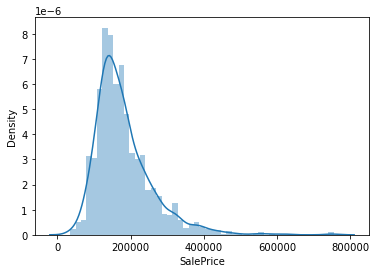

In [59]:
# plotting the graph to check if the values are uniformally distributed or not.
sns.distplot(house['SalePrice'])
plt.show()

As per the above graph the values are right skewed. In order to handle this we will use log transformation

In [60]:
# using log transformation to handle the skewness
house['SalePrice'] = np.log(house['SalePrice'])

In [61]:
# now to check if the issue is solved or not
house['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

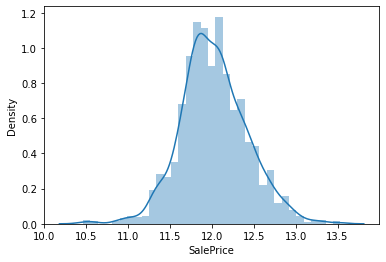

In [62]:
# plotting the graph to check if the values are uniformally distributed or not.
sns.distplot(house['SalePrice'])
plt.show()

Now the values are uniformally distributed and log transformation helped in solwing the issue of log transformation.

#### Splitting the data into train and test 

In [63]:
# splitting the data into test and train
X = house.drop(['SalePrice'],axis=1)
y = house['SalePrice']

#### Scaling the features

In [64]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=175)

In [65]:
# Splitting the data into test and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [66]:
#checking the shape of the model
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 175)
(438, 175)
(1021,)
(438,)


#### Model Building and Evaluation

In [67]:
# Lets start by building regular Linear Regression Model

lr = LinearRegression()

#fitting a line
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
#Printing the coefficents and intercept
print(lr.coef_)
print(lr.intercept_)

[-1.65093758e-02  2.37081517e-02  1.69730786e-02  1.90922619e-02
  4.19686326e-04 -2.96731507e-03 -1.06326214e-03  7.06786807e-02
  3.83519221e-02  4.95854972e-02  1.78412061e-02  1.45449039e-04
 -2.26009037e-03 -1.61094135e-02  1.37775077e-04 -1.66332893e-02
 -1.83990832e-02  2.74376751e-03 -8.67913521e-03 -9.17536416e-03
  1.43673807e-02  1.26259362e-01  2.27139621e-02  3.72304540e-03
  2.38579299e-02  1.95675145e-02  8.76450281e-03 -1.21913020e-02
 -1.03393501e-02  2.36466809e-02 -2.73885983e-02  1.68986632e-02
 -5.39316619e-03  3.59333069e-02 -5.88315158e-04  8.16189684e-04
 -6.15263089e-03  4.42394671e-03  5.94388524e-03 -1.83955380e-03
 -3.99920551e-03  7.09218548e-03  3.26858989e-03  2.24021799e-03
  3.18422644e-03  9.15742728e-03 -6.02796287e-03 -4.31606445e-03
  1.14319492e-05  1.26538564e-03 -1.30854990e-02  1.13444551e-02
  1.57609404e-02  5.14333561e-03  3.02495336e-02  1.81164749e-03
  2.28928043e-03 -9.28255182e-03 -1.98913868e-02  2.44745338e-03
  1.33427705e-02  4.12601

In [69]:
# to check r2 score and mean squared error
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
# calculating the r2 score, RSS and RMSE
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9412815336909861
-3.793819296471422e+22
9.42385832231506
2.73415135477898e+24
0.009230027739779685
6.242354691276211e+21


#### Model Building with Ridge and Lasso Regression

#### Ridge Regression

In [71]:
# first need to pass all the lambda values to get different coefficients post which we can check the best alpha values
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_hp = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_hp.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# checking the best hyperparameter aplha value
print(model_hp.best_params_)

{'alpha': 100}


In [73]:
# now fitting the model based on the best value prescribed above
alpha = 100

ridge = Ridge(alpha = alpha)

ridge.fit(X_train,y_train)
print(ridge.coef_)

[-1.12927446e-02  1.64853986e-02 -9.68885888e-04  1.29097801e-02
 -1.97146425e-03 -4.31451478e-03  3.95672595e-03  6.58719143e-02
  2.91034102e-02  1.39548148e-02  1.95977405e-02  4.87891118e-03
 -1.22395990e-03 -2.26996070e-02 -3.47306173e-03 -1.96007093e-02
 -2.60920910e-02 -2.01908931e-03  6.78993260e-03 -1.10346674e-02
  1.85573816e-02  5.89169409e-02  2.31698645e-02  3.34612713e-03
  3.35824929e-02  2.46100361e-02  1.50087041e-02 -1.07642672e-02
 -1.87827577e-02  3.72861304e-02 -1.47558879e-02  2.30104182e-02
 -1.20931435e-02  3.34615053e-02 -9.48426187e-03 -1.18911605e-03
 -7.12982612e-03  3.17414754e-03  7.70739149e-03 -2.77085593e-04
 -5.05435302e-03  4.51544640e-03  6.91926226e-03  6.38657924e-03
  9.02866397e-03  1.04453864e-02 -7.79212896e-03 -5.07960821e-03
 -3.09763363e-03 -1.50236842e-03 -1.41113177e-02 -1.16229675e-03
  1.18826349e-02 -4.57106846e-03  2.36704743e-02 -1.62475615e-02
 -4.57140289e-03 -1.98729200e-02 -2.31701147e-02 -4.10129532e-03
 -3.37165805e-03 -2.22537

In [74]:
# calculating the r2 score, RSS and RMSE for ridge regression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_r = []
r2_train_rr = r2_score(y_train, y_pred_train)
print(r2_train_rr)
metric_r.append(r2_train_rr)

r2_test_rr = r2_score(y_test, y_pred_test)
print(r2_train_rr)
metric_r.append(r2_train_rr)

rss1_rr = np.sum(np.square(y_train - y_pred_train))
print(rss1_rr)
metric_r.append(rss1_rr)

rss1_rr = np.sum(np.square(y_test - y_pred_test))
print(rss1_rr)
metric_r.append(rss1_rr)

mse_train_rr = mean_squared_error(y_train, y_pred_train)
print(mse_train_rr)
metric_r.append(mse_train_rr**0.5)

mse_test_rr = mean_squared_error(y_test, y_pred_test)
print(mse_test_rr)
metric_r.append(mse_test_rr**0.5)

0.9226131018230904
0.9226131018230904
12.419996813007094
8.807348312291262
0.01216454144271018
0.020108101169614753


In [75]:
# prediction score for training values for ridge regression
ridge.score(X_train,y_train)

0.9226131018230904

In [76]:
# prediction score for testing values for ridge regression
ridge.score(X_test,y_test)

0.877792105694834

In [77]:
#ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', -0.034),
 ('MSZoning', -0.026),
 ('LotFrontage', -0.024),
 ('LotArea', -0.023),
 ('LotShape', -0.023),
 ('Utilities', -0.02),
 ('LandSlope', -0.02),
 ('OverallQual', -0.019),
 ('OverallCond', -0.016),
 ('YearBuilt', -0.015),
 ('YearRemodAdd', -0.014),
 ('ExterQual', -0.014),
 ('ExterCond', -0.013),
 ('BsmtQual', -0.013),
 ('BsmtCond', -0.012),
 ('BsmtExposure', -0.011),
 ('BsmtFinType1', -0.011),
 ('BsmtFinType2', -0.011),
 ('BsmtUnfSF', -0.01),
 ('HeatingQC', -0.01),
 ('CentralAir', -0.009),
 ('1stFlrSF', -0.008),
 ('BsmtFullBath', -0.008),
 ('BsmtHalfBath', -0.008),
 ('FullBath', -0.007),
 ('HalfBath', -0.007),
 ('BedroomAbvGr', -0.006),
 ('KitchenAbvGr', -0.006),
 ('KitchenQual', -0.005),
 ('TotRmsAbvGrd', -0.005),
 ('Functional', -0.005),
 ('Fireplaces', -0.005),
 ('GarageFinish', -0.005),
 ('GarageArea', -0.004),
 ('GarageQual', -0.004),
 ('GarageCond', -0.004),
 ('PavedDrive', -0.004),
 ('OpenPorchSF', -0.004),
 ('ScreenPorch', -0.004),
 ('M

#### Lasso Regression

In [78]:
lasso = Lasso()

# cross validation
folds = 5
model_hp = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_hp.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
# checking the best alpha values for Lasso Regression

print(model_hp.best_params_)

{'alpha': 0.001}


In [80]:
# fitting lasso model for aplha = 0.001 and printing coefficients 

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [81]:
print(lasso.coef_)

[-1.62997000e-02  1.91891139e-02  8.54670731e-03  1.47896205e-02
  0.00000000e+00 -3.07523566e-03  5.14311876e-04  7.72567856e-02
  3.59900633e-02  2.98761025e-02  1.87855218e-02  0.00000000e+00
 -5.51774959e-04 -1.93285021e-02 -0.00000000e+00 -1.76461305e-02
 -2.40681106e-02 -0.00000000e+00 -0.00000000e+00 -9.21410979e-03
  1.64247815e-02  1.01410641e-01  2.33149931e-02  2.24216745e-03
  2.81504167e-02  2.45943471e-02  7.33946778e-03 -1.45562848e-02
 -1.15132523e-02  3.20662482e-02 -2.05780321e-02  1.78938661e-02
 -8.21091941e-03  3.45224223e-02 -4.28410160e-03 -0.00000000e+00
 -6.88552231e-03  3.08006965e-03  5.29974071e-03 -0.00000000e+00
 -3.67703454e-03  4.56470648e-03  8.81225123e-04  4.05797682e-04
  0.00000000e+00  9.85859835e-03 -5.15015594e-03 -3.12386019e-03
 -0.00000000e+00 -0.00000000e+00 -1.40992508e-02  1.12596599e-03
  1.45482880e-02 -0.00000000e+00  2.49267541e-02 -7.56282231e-03
 -0.00000000e+00 -1.67926025e-02 -2.07767870e-02 -3.44575404e-04
  1.77297451e-03 -0.00000

In [82]:
# checking r2 score, RSS and RSME values
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_l = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_l.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_l.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_l.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_l.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_l.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_l.append(mse_test_lr**0.5)

0.9368835093889571
0.8722850984747809
10.129707104234921
9.204230453343428
0.0099213585741772
0.021014224779322892


In [83]:
# prediction score for training variables for lasso regression
lasso.score(X_train,y_train)

0.9368835093889571

In [84]:
# prediction score for testing variables for lasso regression
lasso.score(X_test,y_test)

0.8722850984747809

In [85]:
# Lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', -0.049),
 ('MSZoning', -0.046),
 ('LotFrontage', -0.024),
 ('LotArea', -0.021),
 ('LotShape', -0.021),
 ('Utilities', -0.019),
 ('LandSlope', -0.018),
 ('OverallQual', -0.018),
 ('OverallCond', -0.017),
 ('YearBuilt', -0.016),
 ('YearRemodAdd', -0.015),
 ('ExterQual', -0.014),
 ('ExterCond', -0.013),
 ('BsmtQual', -0.012),
 ('BsmtCond', -0.01),
 ('BsmtExposure', -0.009),
 ('BsmtFinType1', -0.008),
 ('BsmtFinType2', -0.008),
 ('BsmtUnfSF', -0.008),
 ('HeatingQC', -0.007),
 ('CentralAir', -0.007),
 ('1stFlrSF', -0.007),
 ('BsmtFullBath', -0.006),
 ('BsmtHalfBath', -0.006),
 ('FullBath', -0.005),
 ('HalfBath', -0.005),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', -0.004),
 ('KitchenQual', -0.003),
 ('TotRmsAbvGrd', -0.003),
 ('Functional', -0.003),
 ('Fireplaces', -0.003),
 ('GarageFinish', -0.003),
 ('GarageArea', -0.002),
 ('GarageQual', -0.002),
 ('GarageCond', -0.002),
 ('PavedDrive', -0.001),
 ('OpenPorchSF', -0.001),
 ('ScreenPorch', -0.001),
 

In [86]:
# creating a table to summarise all the above values
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_r, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.412815e-01,0.922613,0.936884
1,R2 Score (Test),-3.793819e+22,0.922613,0.872285
2,RSS (Train),9.423858e+00,12.419997,10.129707
3,RSS (Test),2.734151e+24,8.807348,9.204230
4,MSE (Train),9.607303e-02,0.110293,0.099606
5,MSE (Test),7.900857e+10,0.141803,0.144963


In [87]:
# checking the change in the beta coefficients for all the 3 models
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-1.650938e-02,-0.011293,-0.016300
MSZoning,2.370815e-02,0.016485,0.019189
LotFrontage,1.697308e-02,-0.000969,0.008547
LotArea,1.909226e-02,0.012910,0.014790
LotShape,4.196863e-04,-0.001971,0.000000
Utilities,-2.967315e-03,-0.004315,-0.003075
LandSlope,-1.063262e-03,0.003957,0.000514
OverallQual,7.067868e-02,0.065872,0.077257
OverallCond,3.835192e-02,0.029103,0.035990
YearBuilt,4.958550e-02,0.013955,0.029876


#### Summary:

* Ridge Regression Scores : Alpha : 100, Train : 92.26, Test : 87.77
* Lasso Regression Scores : Alpha : 0.001, Train : 93.66, Test : 87.22

In terms of scores there is no much difference which means can use either of the regularization techniques

In [88]:
# Top 5 models based on Ridge Regression
betas.sort_values(by='Ridge',ascending=False).head(5)

,Linear,Ridge,Lasso
OverallQual,0.070679,0.065872,0.077257
1stFlrSF,0.126259,0.058917,0.101411
RoofMatl_CompShg,0.322801,0.042096,0.214506
TotRmsAbvGrd,0.023647,0.037286,0.032066
FullBath,0.023858,0.033582,0.028150


In [89]:
# Top 5 models based on Lasso Regression
betas.sort_values(by='Lasso',ascending=False).head(5)

Index(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', '1stFlrSF',
       'RoofMatl_WdShake'],
      dtype='object')

****************************************************************************************************************************************************

#### Subjective Questions Workspace

Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans : As per the above model description the Optimal Values of ridge and lasso regression are 100 and 0.001. Now to work on doubling the alpha values

In [90]:
# For ridge regression the alpha value is 100 so, doubling them is 2*100 which is 200.

alpha = 200

ridge2 = Ridge(alpha = alpha)

ridge2.fit(X_train,y_train)
print(ridge2.coef_)


[-1.01783897e-02  1.10247188e-02  9.53811936e-04  1.28539642e-02
 -9.52952378e-04 -4.14486018e-03  4.00863939e-03  5.92929267e-02
  2.58419237e-02  1.29333070e-02  1.99593866e-02  9.91647305e-03
 -5.80617552e-04 -2.31128998e-02 -4.39916762e-03 -1.90596954e-02
 -2.48570678e-02 -2.42826034e-03  7.42962024e-03 -1.14618169e-02
  1.82353583e-02  4.97234615e-02  2.15824519e-02  2.85079013e-03
  3.17968392e-02  2.31387099e-02  1.62222872e-02 -9.27569671e-03
 -2.08107244e-02  3.69359291e-02 -1.27599956e-02  2.46622090e-02
 -1.31738225e-02  3.23983028e-02 -1.14550856e-02 -1.45561190e-03
 -7.29893787e-03  3.90702066e-03  7.75052782e-03  4.03623268e-06
 -4.87566020e-03  4.45222780e-03  6.24343745e-03  5.89510520e-03
  7.28551581e-03  1.07000697e-02 -7.15441645e-03 -4.22859791e-03
 -2.73964759e-03 -1.05574993e-03 -1.20109843e-02 -8.91105581e-04
  1.09369086e-02 -5.13151358e-03  2.24080286e-02 -1.61289958e-02
 -5.45102684e-03 -1.88432087e-02 -2.04701360e-02 -4.13687149e-03
 -3.41034609e-03 -1.99602

In [91]:
# calculating the r2 score, RSS and RMSE for ridge regression
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric_r2 = []
r2_train_rr = r2_score(y_train, y_pred_train)
print(r2_train_rr)
metric_r2.append(r2_train_rr)

r2_test_rr = r2_score(y_test, y_pred_test)
print(r2_train_rr)
metric_r2.append(r2_train_rr)

rss2_rr = np.sum(np.square(y_train - y_pred_train))
print(rss2_rr)
metric_r2.append(rss2_rr)

rss2_rr = np.sum(np.square(y_test - y_pred_test))
print(rss2_rr)
metric_r2.append(rss2_rr)

mse_train_rr = mean_squared_error(y_train, y_pred_train)
print(mse_train_rr)
metric_r2.append(mse_train_rr**0.5)

mse_test_rr = mean_squared_error(y_test, y_pred_test)
print(mse_test_rr)
metric_r2.append(mse_test_rr**0.5)

0.9162618944337023
0.9162618944337023
13.439316328238473
8.828677597329634
0.013162895522270786
0.020156798167419256


In [92]:
# Ridge model parameters
model_parameters = list(sorted(ridge2.coef_))
model_parameters.insert(0, ridge2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.025),
 ('MSSubClass', -0.028),
 ('MSZoning', -0.025),
 ('LotFrontage', -0.023),
 ('LotArea', -0.021),
 ('LotShape', -0.02),
 ('Utilities', -0.019),
 ('LandSlope', -0.019),
 ('OverallQual', -0.018),
 ('OverallCond', -0.016),
 ('YearBuilt', -0.013),
 ('YearRemodAdd', -0.013),
 ('ExterQual', -0.013),
 ('ExterCond', -0.012),
 ('BsmtQual', -0.012),
 ('BsmtCond', -0.011),
 ('BsmtExposure', -0.011),
 ('BsmtFinType1', -0.01),
 ('BsmtFinType2', -0.01),
 ('BsmtUnfSF', -0.009),
 ('HeatingQC', -0.009),
 ('CentralAir', -0.008),
 ('1stFlrSF', -0.008),
 ('BsmtFullBath', -0.008),
 ('BsmtHalfBath', -0.007),
 ('FullBath', -0.007),
 ('HalfBath', -0.007),
 ('BedroomAbvGr', -0.006),
 ('KitchenAbvGr', -0.006),
 ('KitchenQual', -0.005),
 ('TotRmsAbvGrd', -0.005),
 ('Functional', -0.005),
 ('Fireplaces', -0.005),
 ('GarageFinish', -0.005),
 ('GarageArea', -0.005),
 ('GarageQual', -0.004),
 ('GarageCond', -0.004),
 ('PavedDrive', -0.004),
 ('OpenPorchSF', -0.004),
 ('ScreenPorch', -0.004),
 ('

In [93]:
# Fitting Lasso regression model coefficients for doubled alpha values of 0.001*2 = 0.002
alpha =0.002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 
print(lasso2.coef_)

[-0.01686828  0.01351177  0.00141396  0.01349885  0.         -0.0029159
  0.00086623  0.08397044  0.033595    0.01917079  0.01850561  0.
 -0.         -0.02166553 -0.         -0.01832415 -0.02433436 -0.
  0.         -0.00969353  0.01585032  0.08293572  0.02209798  0.00108689
  0.03106929  0.02713957  0.00901238 -0.01355271 -0.0140804   0.03899277
 -0.01642328  0.01908933 -0.01023351  0.03466806 -0.00546643 -0.
 -0.00706002  0.00159102  0.00490419 -0.         -0.00367025  0.00280896
  0.00024125  0.00102613  0.          0.01006146 -0.00502605 -0.00213043
 -0.         -0.         -0.01312149  0.          0.0150431  -0.
  0.02403811 -0.01051401 -0.         -0.01825855 -0.0186579  -0.
  0.00015124 -0.0002712  -0.          0.01975297  0.02186329 -0.01096692
  0.00491745 -0.00031686  0.00055094  0.02462358  0.01376643  0.
  0.00726166 -0.0011157   0.01538855  0.00233316  0.00259904 -0.00575925
  0.00123907  0.          0.         -0.          0.          0.00297338
 -0.04219688 -0.00355793 -0

In [94]:
# calculating the r2 score, RSS and RMSE for ridge regression
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric_l2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_l2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_l2.append(r2_test_lr)

rss2_lr = np.sum(np.square(y_train - y_pred_train))
print(rss2_lr)
metric_l2.append(rss2_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_l2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_l2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_l2.append(mse_test_lr**0.5)

0.9286381363220795
0.8760435756929017
11.453025516333133
8.933362370949812
0.011217458879856155
0.020395804499885414


In [95]:
# lasso model parameters
model_parameters = list(sorted(lasso2.coef_))
model_parameters.insert(0, lasso2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.024),
 ('MSSubClass', -0.042),
 ('MSZoning', -0.031),
 ('LotFrontage', -0.024),
 ('LotArea', -0.022),
 ('LotShape', -0.019),
 ('Utilities', -0.018),
 ('LandSlope', -0.018),
 ('OverallQual', -0.017),
 ('OverallCond', -0.016),
 ('YearBuilt', -0.014),
 ('YearRemodAdd', -0.014),
 ('ExterQual', -0.013),
 ('ExterCond', -0.013),
 ('BsmtQual', -0.011),
 ('BsmtCond', -0.011),
 ('BsmtExposure', -0.01),
 ('BsmtFinType1', -0.01),
 ('BsmtFinType2', -0.009),
 ('BsmtUnfSF', -0.009),
 ('HeatingQC', -0.007),
 ('CentralAir', -0.007),
 ('1stFlrSF', -0.006),
 ('BsmtFullBath', -0.006),
 ('BsmtHalfBath', -0.005),
 ('FullBath', -0.005),
 ('HalfBath', -0.005),
 ('BedroomAbvGr', -0.004),
 ('KitchenAbvGr', -0.004),
 ('KitchenQual', -0.003),
 ('TotRmsAbvGrd', -0.003),
 ('Functional', -0.003),
 ('Fireplaces', -0.002),
 ('GarageFinish', -0.002),
 ('GarageArea', -0.002),
 ('GarageQual', -0.002),
 ('GarageCond', -0.002),
 ('PavedDrive', -0.001),
 ('OpenPorchSF', -0.001),
 ('ScreenPorch', -0.001),
 (

In [96]:
# creating a table to summarise all the above values
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
       
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric_r2, name = 'Ridge Regression')
ls_metric = pd.Series(metric_l2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.916262,0.928638
1,R2 Score (Test),0.916262,0.876044
2,RSS (Train),13.439316,11.453026
3,RSS (Test),8.828678,8.933362
4,MSE (Train),0.114730,0.105913
5,MSE (Test),0.141975,0.142814


In [97]:
# checking the change in the beta coefficients for all the 2 models after changing the alpha values
betas_alphas = pd.DataFrame(index=X.columns)
betas_alphas.rows = X.columns
betas_alphas['Ridge2'] = ridge2.coef_
betas_alphas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas_alphas

,Ridge2,Lasso2
MSSubClass,-0.010178,-0.016868
MSZoning,0.011025,0.013512
LotFrontage,0.000954,0.001414
LotArea,0.012854,0.013499
LotShape,-0.000953,0.000000
Utilities,-0.004145,-0.002916
LandSlope,0.004009,0.000866
OverallQual,0.059293,0.083970
OverallCond,0.025842,0.033595
YearBuilt,0.012933,0.019171


In [98]:
# Top 5 models based on Ridge Regression
betas_alphas.sort_values(by='Ridge2',ascending=False).head(5)

,Ridge2,Lasso2
OverallQual,0.059293,0.083970
1stFlrSF,0.049723,0.082936
TotRmsAbvGrd,0.036936,0.038993
GarageArea,0.032398,0.034668
FullBath,0.031797,0.031069


In [99]:
# Top 5 models based on Lasso Regression
betas_alphas.sort_values(by='Lasso2',ascending=False).head(5)

,Ridge2,Lasso2
RoofMatl_CompShg,0.021943,0.123888
OverallQual,0.059293,0.083970
1stFlrSF,0.049723,0.082936
RoofMatl_Tar&Grv,0.012701,0.081352
RoofMatl_WdShngl,0.022457,0.070378


Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [100]:
X_train_new = X_train.drop(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', '1stFlrSF',
       'RoofMatl_WdShake'],axis = 1)

In [101]:
X_test_new = X_test.drop(['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', '1stFlrSF',
       'RoofMatl_WdShake'],axis = 1)

In [102]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train)
y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

In [103]:
print(lasso.coef_)

[-2.25787090e-02  2.28862995e-02 -9.64872651e-04  1.61486843e-02
 -3.18612513e-04 -3.77772892e-03  1.05013757e-03  9.27932296e-02
  3.10340205e-02  0.00000000e+00  1.85840674e-02 -0.00000000e+00
 -1.00799208e-03 -2.55718882e-02 -0.00000000e+00 -2.66808327e-02
 -3.27375655e-02 -2.43844309e-03  1.81991387e-02 -9.73451759e-03
  1.76413115e-02  3.03530036e-02  5.08298305e-03  4.48412345e-02
  3.03897390e-02  1.18707458e-02 -8.65401799e-03 -1.78514683e-02
  5.96718632e-02 -8.96951118e-03  2.55779147e-02 -1.37240370e-02
  4.39494877e-02 -6.39081681e-03 -7.71627509e-04 -7.86292302e-03
  2.09135066e-03  5.54329504e-03 -0.00000000e+00 -6.43911871e-03
  2.76457424e-03  2.03057006e-03  4.51262818e-03  4.33517124e-03
  1.09802498e-02 -9.67039714e-03 -4.91340410e-03 -1.55477199e-03
 -1.85405837e-03 -1.55672848e-02  9.16422190e-05  1.57368514e-02
 -0.00000000e+00  2.82213254e-02 -1.16552549e-02 -0.00000000e+00
 -2.10276873e-02 -2.21441793e-02 -0.00000000e+00  1.82448447e-04
 -4.32450039e-03 -2.39648

In [104]:
betas_alphas = pd.DataFrame(index=X_test_new.columns)
betas_alphas.rows = X_test_new.columns
betas_alphas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas_alphas.sort_values(by='Lasso',ascending=False).head(5)


,Lasso
OverallQual,0.092793
TotRmsAbvGrd,0.059672
FullBath,0.044841
GarageArea,0.043949
Neighborhood_Somerst,0.033011
